**SUPPORT VECTOR MACHINE CLASSIFIER**

Implementation of Dual form Of Support Vector Machine Classifier. After implementing it is applied to "Online News Popularity Dataset" to predict the most popular pages 

Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING DATASET

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ML/OnlineNewsPopularity.csv")
data.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

## **DATA PREPROCESSING**

### **Data Cleaning**

**Checking for missing values**

In [5]:
# Creating a missinng value function 
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])  
    return missing_data

missing_check(data)

Total  Percent
url                             0      0.0
 weekday_is_monday              0      0.0
 weekday_is_wednesday           0      0.0
 weekday_is_thursday            0      0.0
 weekday_is_friday              0      0.0
...                           ...      ...
 kw_min_avg                     0      0.0
 kw_max_avg                     0      0.0
 kw_avg_avg                     0      0.0
 self_reference_min_shares      0      0.0
 shares                         0      0.0

[61 rows x 2 columns]

In [6]:
# data.isna().sum()

**Removing white space**

In [7]:
data.columns = data.columns.str.replace(" ", "")
data

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
...                                                  ...        ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                      0.815385        4.0             2.0       1.0  ...   
1                      0.791946        3.0             1.0       1.0  ...   
2                      0.663866        3.0             1.0       1.0  ...   
3                      0.665635        9.0             0.0       1.0  ...   
4                      0.540890       19.0            19.0      20.0  ...   
...                         ...        ...             ...       ...  ...   
39639                  0.684783        9.0             7.0       1.0  ...   
39640                  0.885057        9.0             7.0       3.0  ...   
39641                  0.644128       24.0             1.0      12.0  ...   
39642                  0.692661       10.0             1.0       1.0  ...   
39643                  0.846154        1.0             1.0       0.0  ...   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.5

CHECKING HOW THE TARGET CLASS 'SHARES' DATA IS SPREAD

<Axes: xlabel='timedelta', ylabel='shares'>

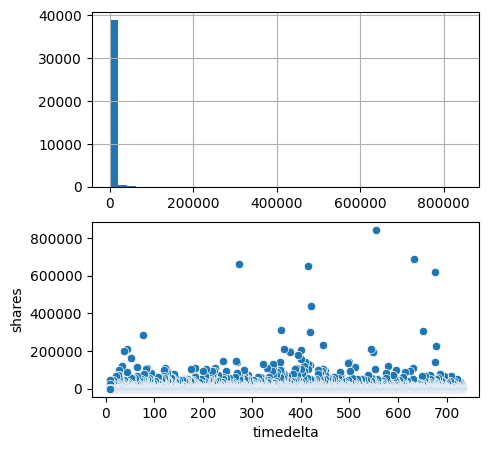

In [8]:
# analyse how the sharing data is spread
plt.subplots(2,1,figsize=(5,5))
plt.subplot(2,1,1)
data['shares'].hist(bins = 40)
plt.subplot(2,1,2)
sns.scatterplot(data=data, x='timedelta', y='shares')
# plt.subplot(3,1,3)
# sns.boxplot(data = data['shares'])

<Axes: >

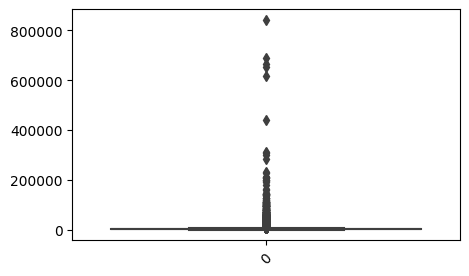

In [9]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=45)
sns.boxplot(data = data['shares'])

We can see that the data is very skewed. We can also observe that there are very low no. of articles with very large number of shares. 
So, next let us try to find and remove the outliers

In [10]:
# Trimming the values
# data['shares'] = data['shares'].clip(data['shares'].quantile(.25), data['shares'].quantile(.75))
Q1 = data['shares'].quantile(0.25)
Q3 = data['shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
data = data.drop(data[data['shares'] > UTV].index)
data.shape

(35103, 61)

<Axes: xlabel='timedelta', ylabel='shares'>

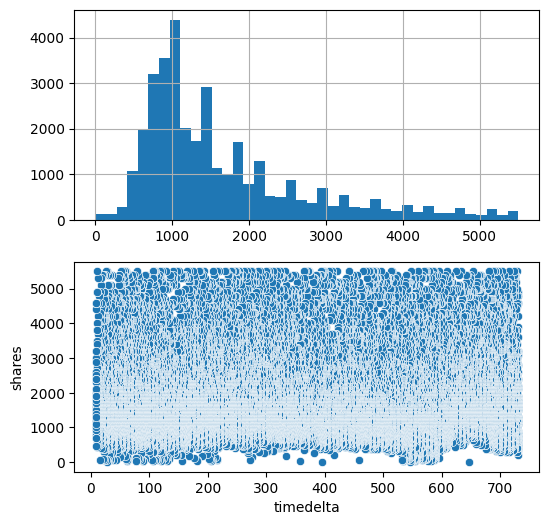

In [11]:
plt.subplots(2,1,figsize=(6,6))
plt.subplot(2,1,1)
data['shares'].hist(bins = 40)
plt.subplot(2,1,2)
sns.scatterplot(data=data, x='timedelta', y='shares')

<Axes: >

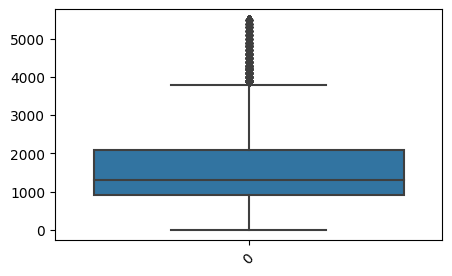

In [12]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=45)
sns.boxplot(data = data['shares'])

In [13]:
data['shares'].describe()

count    35103.000000
mean      1671.972652
std       1103.199563
min          1.000000
25%        903.000000
50%       1300.000000
75%       2100.000000
max       5500.000000
Name: shares, dtype: float64

**Pick a threshold for high versus low page shares for the class feature**

In [14]:
data['Target'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)

Drop rows with articles having zero contents

In [15]:
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=data[data['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 970


In [16]:
# Drop the rows with n_tokens_content = 0
data = data[data['n_tokens_content'] != 0]


In [17]:
data = data.reset_index(drop=True)
data

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
...                                                  ...        ...   
34128  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
34129  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0   
34130  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
34131     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
34132  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
34128            11.0             346.0         0.529052               1.0   
34129            12.0             328.0         0.696296               1.0   
34130            10.0             442.0         0.516355               1.0   
34131             6.0             682.0         0.539493               1.0   
34132            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                      0.815385        4.0             2.0       1.0  ...   
1                      0.791946        3.0             1.0       1.0  ...   
2                      0.663866        3.0             1.0       1.0  ...   
3                      0.665635        9.0             0.0       1.0  ...   
4                      0.540890       19.0            19.0      20.0  ...   
...                         ...        ...             ...       ...  ...   
34128                  0.684783        9.0             7.0       1.0  ...   
34129                  0.885057        9.0             7.0       3.0  ...   
34130                  0.644128       24.0             1.0      12.0  ...   
34131                  0.692661       10.0             1.0       1.0  ...   
34132                  0.846154        1.0             1.0       0.0  ...   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
34128                   0.75              -0.260000                 -0.500   
34129                   0.70              -0.211111                 -0.400   
34130                   0.50              -0.356439                 -0.800   
34131                   0.50              -0.205246                 -0.500   
34132                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4          

### **Removing Unwanted Columns**

In [18]:
data = data.drop(columns = {"url", "timedelta", "shares"})
data

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
34128            11.0             346.0         0.529052               1.0   
34129            12.0             328.0         0.696296               1.0   
34130            10.0             442.0         0.516355               1.0   
34131             6.0             682.0         0.539493               1.0   
34132            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
34128                  0.684783        9.0             7.0       1.0   
34129                  0.885057        9.0             7.0       3.0   
34130                  0.644128       24.0             1.0      12.0   
34131                  0.692661       10.0             1.0       1.0   
34132                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
34128         1.0              4.523121  ...               0.100000   
34129        48.0              4.405488  ...               0.136364   
34130         1.0              5.076923  ...               0.136364   
34131         0.0              4.975073  ...               0.062500   
34132         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
34128                   0.75              -0.260000                 -0.500   
34129                   0.70              -0.211111                 -0.400   
34130                   0.50              -0.356439                 -0.800   
34131                   0.50              -0.205246                 -0.500   
34132                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

<Axes: >

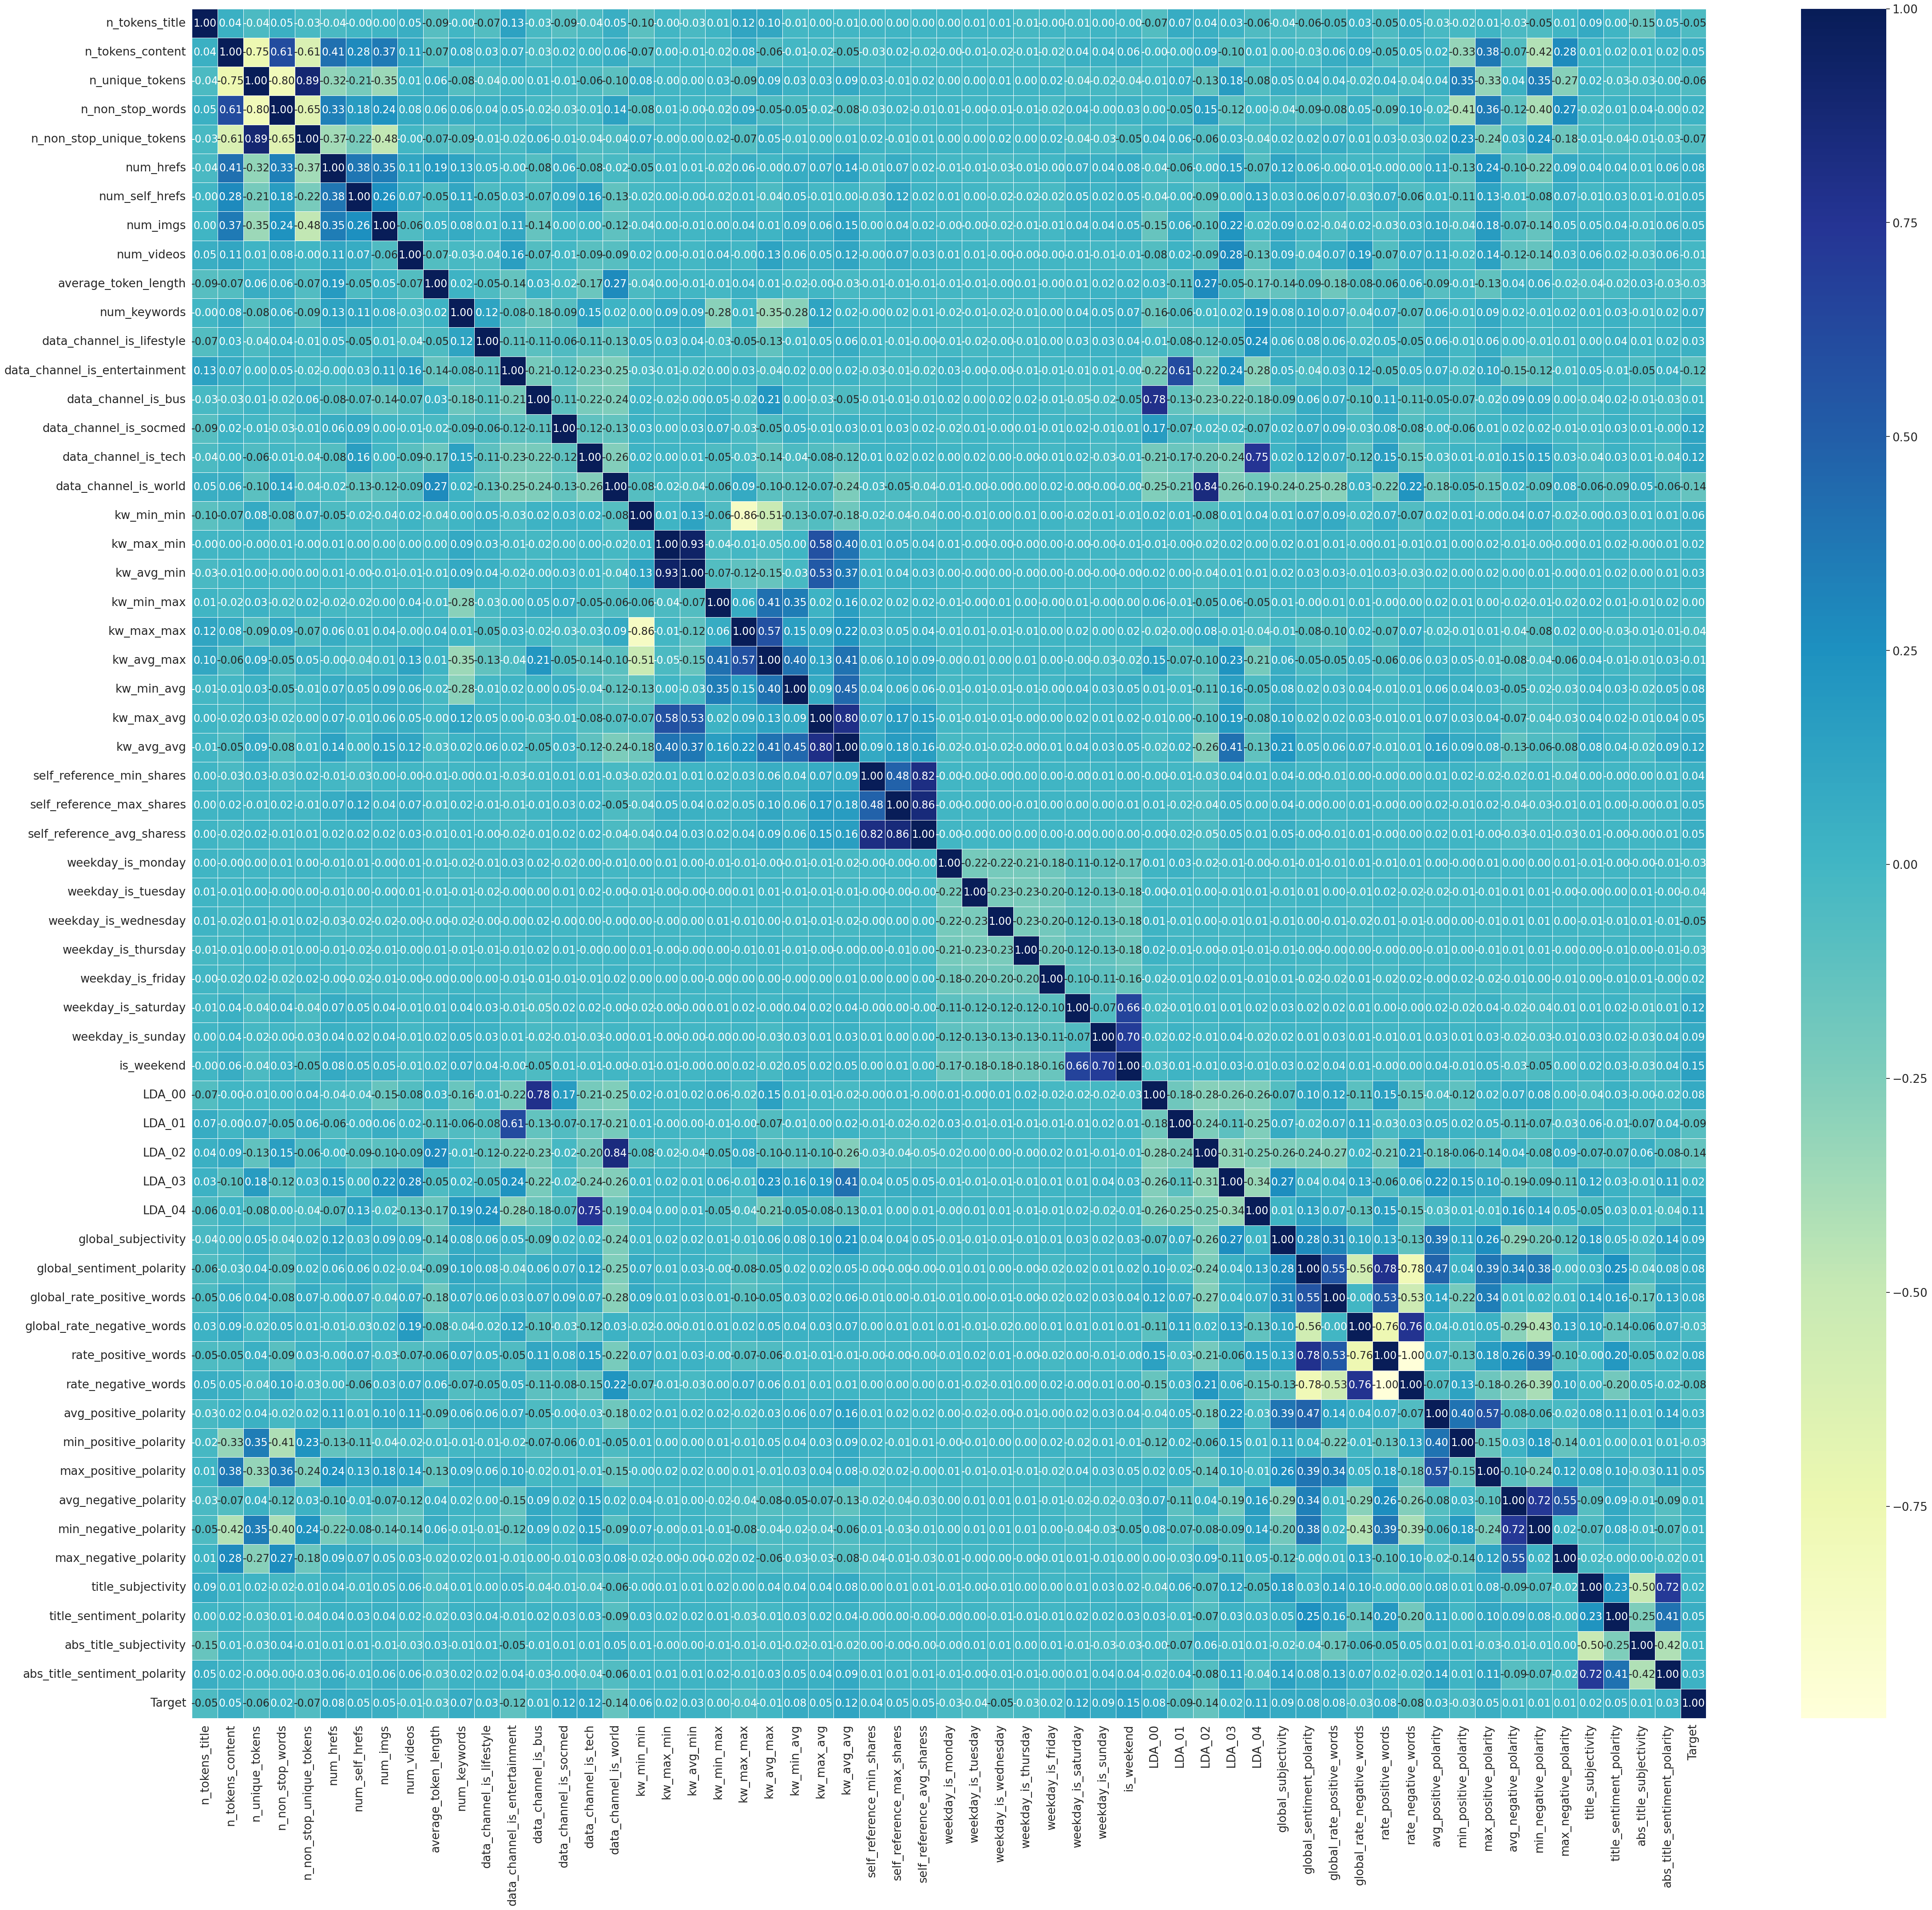

In [19]:
corr = data.corr()
sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(55,50))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 17}, linewidths=.5, ax=ax)

In [20]:
# create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# get pairs of highly correlated features
high_corr_pairs = [(corr.index[i], corr.columns[j]) for i, j in np.argwhere(np.abs(corr.values) > 0.8) if i < j]

# print the pairs of highly correlated features
print(high_corr_pairs)

[('n_unique_tokens', 'n_non_stop_words'), ('n_unique_tokens', 'n_non_stop_unique_tokens'), ('data_channel_is_world', 'LDA_02'), ('kw_min_min', 'kw_max_max'), ('kw_max_min', 'kw_avg_min'), ('kw_max_avg', 'kw_avg_avg'), ('self_reference_min_shares', 'self_reference_avg_sharess'), ('self_reference_max_shares', 'self_reference_avg_sharess'), ('rate_positive_words', 'rate_negative_words')]


In [21]:
# choose to remove one of the features in each highly correlated pair.
data = data.drop(columns = {"n_non_stop_words", "n_non_stop_unique_tokens", "LDA_02", "kw_max_max", "kw_max_min", "kw_max_avg", "self_reference_min_shares", "self_reference_max_shares", "rate_negative_words"})

In [22]:
data.shape

(34133, 50)

<Axes: >

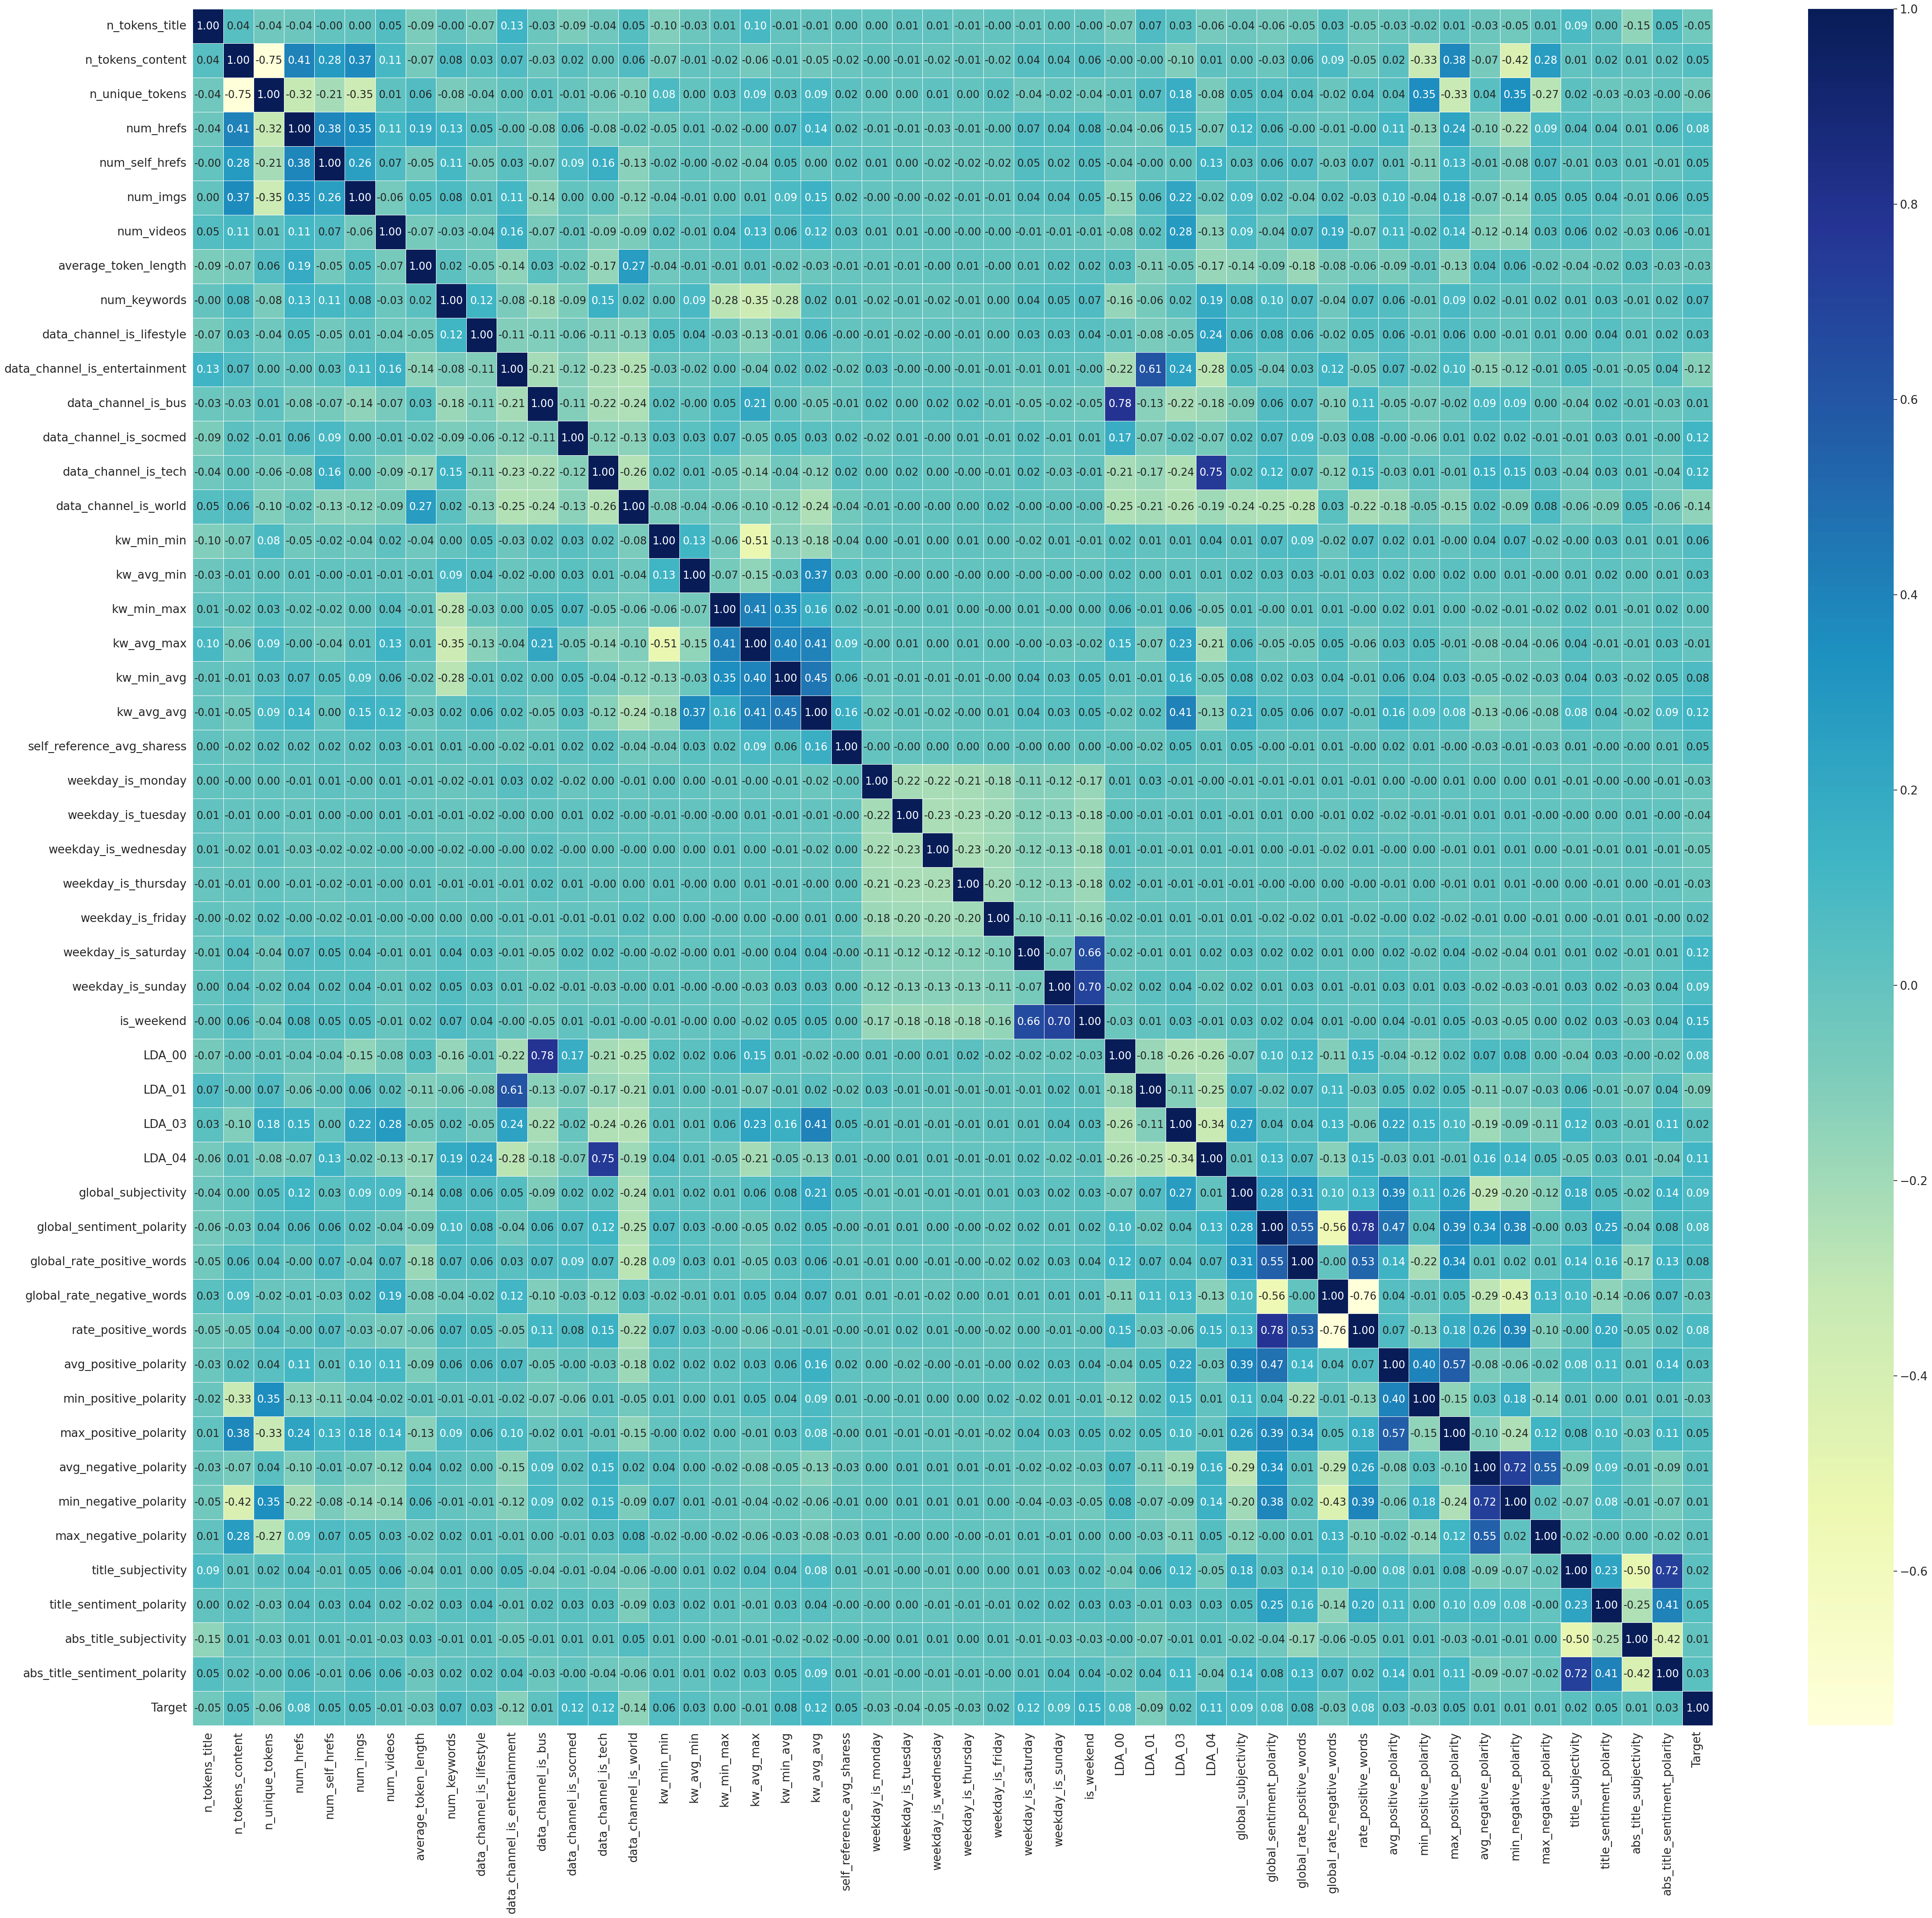

In [23]:
corr = data.corr()
sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(55,50))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 17}, linewidths=.5, ax=ax)

In [24]:
# identifying features that are highly correlated with the target variable.

corr_matrix = corr.abs()

# Get the absolute values of the correlations with the target variable
correlations_with_target = abs(corr['Target'])

# Print out the features that are highly correlated with the target variable
highly_correlated_features = correlations_with_target[correlations_with_target > 0.02].drop(corr_matrix.index[-1])
print(highly_correlated_features)

n_tokens_title                   0.048713
n_tokens_content                 0.051348
n_unique_tokens                  0.060650
num_hrefs                        0.081193
num_self_hrefs                   0.048959
num_imgs                         0.052740
average_token_length             0.033783
num_keywords                     0.070618
data_channel_is_lifestyle        0.033153
data_channel_is_entertainment    0.120687
data_channel_is_socmed           0.121820
data_channel_is_tech             0.121119
data_channel_is_world            0.143655
kw_min_min                       0.059866
kw_avg_min                       0.034882
kw_min_avg                       0.077874
kw_avg_avg                       0.124530
self_reference_avg_sharess       0.053006
weekday_is_monday                0.027648
weekday_is_tuesday               0.041300
weekday_is_wednesday             0.046164
weekday_is_thursday              0.026839
weekday_is_saturday              0.118963
weekday_is_sunday                0

In [25]:
# Select the highly correlated features (including the target feature)
selected_features = list(highly_correlated_features.index) + ['Target']

# Keep only the selected features in the dataset
data = data[selected_features]
data

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
34128            11.0             346.0         0.529052        9.0   
34129            12.0             328.0         0.696296        9.0   
34130            10.0             442.0         0.516355       24.0   
34131             6.0             682.0         0.539493       10.0   
34132            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  average_token_length  num_keywords  \
0                 2.0       1.0              4.680365           5.0   
1                 1.0       1.0              4.913725           4.0   
2                 1.0       1.0              4.393365           6.0   
3                 0.0       1.0              4.404896           7.0   
4                19.0      20.0              4.682836           7.0   
...               ...       ...                   ...           ...   
34128             7.0       1.0              4.523121           8.0   
34129             7.0       3.0              4.405488           7.0   
34130             1.0      12.0              5.076923           8.0   
34131             1.0       1.0              4.975073           5.0   
34132             1.0       0.0              4.471338           4.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  ...  \
0                            0.0                            1.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            1.0  ...   
4                            0.0                            0.0  ...   
...                          ...                            ...  ...   
34128                        0.0                            0.0  ...   
34129                        0.0                            0.0  ...   
34130                        0.0                            0.0  ...   
34131                        0.0                            0.0  ...   
34132                        0.0                            1.0  ...   

       global_sentiment_polarity  global_rate_positive_words  \
0                       0.092562                    0.045662   
1                       0.148948                    0.043137   
2                       0.323333                    0.056872   
3                       0.100705                    0.041431   
4                       0.281003                    0.074627   
...                          ...                         ...   
34128                   0.141964                    0.037572   
34129                   0.194249                    0.039634   
34130                   0.024609                    0.033937   
34131                  -0.008066                    0.020528   
34132                   0.104892                    0.063694   

       global_rate_negative_words  rate_positive_words  avg_positive_polarity  \
0                        0.013699             0.769231               0.378636   
1                        0.015686             0.733333               0.286915   
2                        0.009479             0.857143               0.495833   
3                        0.020716             0.666667               0.385965   
4                        0.012127             0.860215               0.411127   
...                           ...                  ...                    ...   
34128                    0.014451             0.722222               0.333791   
34129              

In [26]:
data.describe()

n_tokens_title  n_tokens_content  n_unique_tokens     num_hrefs  \
count    34133.000000      34133.000000     34133.000000  34133.000000   
mean        10.388158        562.330560         0.546373     10.885214   
std          2.107591        459.838036         0.101425     10.772623   
min          2.000000         21.000000         0.114964      0.000000   
25%          9.000000        262.000000         0.477666      5.000000   
50%         10.000000        426.000000         0.542056      8.000000   
75%         12.000000        727.000000         0.609428     13.000000   
max         20.000000       7764.000000         1.000000    187.000000   

       num_self_hrefs      num_imgs  average_token_length  num_keywords  \
count    34133.000000  34133.000000          34133.000000  34133.000000   
mean         3.390824      4.352445              4.689961      7.191779   
std          3.861295      8.091100              0.281136      1.923601   
min          0.000000      0.000000              3.624585      1.000000   
25%          1.000000      1.000000              4.498084      6.000000   
50%          3.000000      1.000000              4.677700      7.000000   
75%          4.000000      3.000000              4.865762      9.000000   
max        116.000000    128.000000              8.041534     10.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  ...  \
count               34133.000000                   34133.000000  ...   
mean                    0.052266                       0.180763  ...   
std                     0.222566                       0.384828  ...   
min                     0.000000                       0.000000  ...   
25%                     0.000000                       0.000000  ...   
50%                     0.000000                       0.000000  ...   
75%                     0.000000                       0.000000  ...   
max                     1.000000                       1.000000  ...   

       global_sentiment_polarity  global_rate_positive_words  \
count               34133.000000                34133.000000   
mean                    0.122278                    0.040708   
std                     0.095192                    0.016220   
min                    -0.393750                    0.000000   
25%                     0.063802                    0.029326   
50%                     0.121640                    0.039460   
75%                     0.179057                    0.050633   
max                     0.727841                    0.155488   

       global_rate_negative_words  rate_positive_words  avg_positive_polarity  \
count                34133.000000         34133.000000           34133.000000   
mean                     0.017032             0.703283               0.362911   
std                      0.010516             0.150593               0.084662   
min                      0.000000             0.000000               0.000000   
25%                      0.010118             0.612903               0.310806   
50%                      0.015625             0.714286               0.360082   
75%                      0.021898             0.800000               0.411260   
max                      0.162037             1.000000               1.000000   

       min_positive_polarity  max_positive_polarity  title_sentiment_polarity  \
count           34133.000000           34133.000000              34133.000000   
mean                0.097918               0.776582                  0.068380   
std                 0.069737               0.212740                  0.259069   
min                 0.000000               0.000000                 -1.000000   
25%                 0.050000               0.600000                  0.000000   
50%                 0.100000               0.800000                  0.000000   
75%                 0.100000               1.000000                  0.136364   
max                 1.000000               1.000000         

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34133 entries, 0 to 34132
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 34133 non-null  float64
 1   n_tokens_content               34133 non-null  float64
 2   n_unique_tokens                34133 non-null  float64
 3   num_hrefs                      34133 non-null  float64
 4   num_self_hrefs                 34133 non-null  float64
 5   num_imgs                       34133 non-null  float64
 6   average_token_length           34133 non-null  float64
 7   num_keywords                   34133 non-null  float64
 8   data_channel_is_lifestyle      34133 non-null  float64
 9   data_channel_is_entertainment  34133 non-null  float64
 10  data_channel_is_socmed         34133 non-null  float64
 11  data_channel_is_tech           34133 non-null  float64
 12  data_channel_is_world          34133 non-null 

In [28]:
# data.hist(bins=40, figsize=(30,22))
# plt.show()

In [29]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_avg_min', 'kw_min_avg',
       'kw_avg_avg', 'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'title_sentiment_polarity',
       'abs_title_sentiment_polarity', 'Target'],
      dtype='object')

In [30]:
data

n_tokens_title  n_tokens_content  n_unique_tokens  num_hrefs  \
0                12.0             219.0         0.663594        4.0   
1                 9.0             255.0         0.604743        3.0   
2                 9.0             211.0         0.575130        3.0   
3                 9.0             531.0         0.503788        9.0   
4                13.0            1072.0         0.415646       19.0   
...               ...               ...              ...        ...   
34128            11.0             346.0         0.529052        9.0   
34129            12.0             328.0         0.696296        9.0   
34130            10.0             442.0         0.516355       24.0   
34131             6.0             682.0         0.539493       10.0   
34132            10.0             157.0         0.701987        1.0   

       num_self_hrefs  num_imgs  average_token_length  num_keywords  \
0                 2.0       1.0              4.680365           5.0   
1                 1.0       1.0              4.913725           4.0   
2                 1.0       1.0              4.393365           6.0   
3                 0.0       1.0              4.404896           7.0   
4                19.0      20.0              4.682836           7.0   
...               ...       ...                   ...           ...   
34128             7.0       1.0              4.523121           8.0   
34129             7.0       3.0              4.405488           7.0   
34130             1.0      12.0              5.076923           8.0   
34131             1.0       1.0              4.975073           5.0   
34132             1.0       0.0              4.471338           4.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  ...  \
0                            0.0                            1.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            1.0  ...   
4                            0.0                            0.0  ...   
...                          ...                            ...  ...   
34128                        0.0                            0.0  ...   
34129                        0.0                            0.0  ...   
34130                        0.0                            0.0  ...   
34131                        0.0                            0.0  ...   
34132                        0.0                            1.0  ...   

       global_sentiment_polarity  global_rate_positive_words  \
0                       0.092562                    0.045662   
1                       0.148948                    0.043137   
2                       0.323333                    0.056872   
3                       0.100705                    0.041431   
4                       0.281003                    0.074627   
...                          ...                         ...   
34128                   0.141964                    0.037572   
34129                   0.194249                    0.039634   
34130                   0.024609                    0.033937   
34131                  -0.008066                    0.020528   
34132                   0.104892                    0.063694   

       global_rate_negative_words  rate_positive_words  avg_positive_polarity  \
0                        0.013699             0.769231               0.378636   
1                        0.015686             0.733333               0.286915   
2                        0.009479             0.857143               0.495833   
3                        0.020716             0.666667               0.385965   
4                        0.012127             0.860215               0.411127   
...                           ...                  ...                    ...   
34128                    0.014451             0.722222               0.333791   
34129              

Selected Features below and it is commented

In [31]:
# word_features = ['n_tokens_title', 
#                  'n_tokens_content',
#                  'n_unique_tokens',
#                  'num_keywords', 
#                  'average_token_length']

# media_features = ['num_imgs', 'num_videos']

# temporal_features = ['weekday_is_monday', 
#                      'weekday_is_tuesday', 
#                      'weekday_is_wednesday',
#                      'weekday_is_thursday',
#                      'weekday_is_saturday',
#                      'weekday_is_sunday',
#                      'is_weekend']

# channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
#                     'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

# keyword_features = ['kw_min_min', 'kw_avg_min', 'kw_min_avg',
#                     'kw_avg_avg']


# reference_features = ['num_hrefs',
#                       'num_self_hrefs',
#                       'self_reference_avg_sharess']

# topic_features = ['LDA_00', 'LDA_01', 'LDA_04']

# subjectivity_features = ['global_subjectivity']


# sentiment_features = ['global_sentiment_polarity',
#        'global_rate_positive_words', 'global_rate_negative_words',
#        'rate_positive_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'title_sentiment_polarity',
#        'abs_title_sentiment_polarity']



In [32]:
data.isna().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_avg_min                       0
kw_min_avg                       0
kw_avg_avg                       0
self_reference_avg_sharess       0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_saturday              0
weekday_is_sunday                0
is_weekend                       0
LDA_00                           0
LDA_01                           0
LDA_04                           0
global_subjectivity 

Splitting the dataset: data with features columns and another data with target class column only.

In [33]:
data_X = data.iloc[:, :-1]
data_y = data['Target']
# data_X = data[feature_names]
# data_y = data['Target']

In [34]:
data_y

0        0
1        0
2        1
3        0
4        0
        ..
34128    1
34129    1
34130    1
34131    0
34132    0
Name: Target, Length: 34133, dtype: int64

**Standardising Data: Using StandardScaler**

In [35]:
scaler = StandardScaler()

data_X[:] = scaler.fit_transform(data_X)

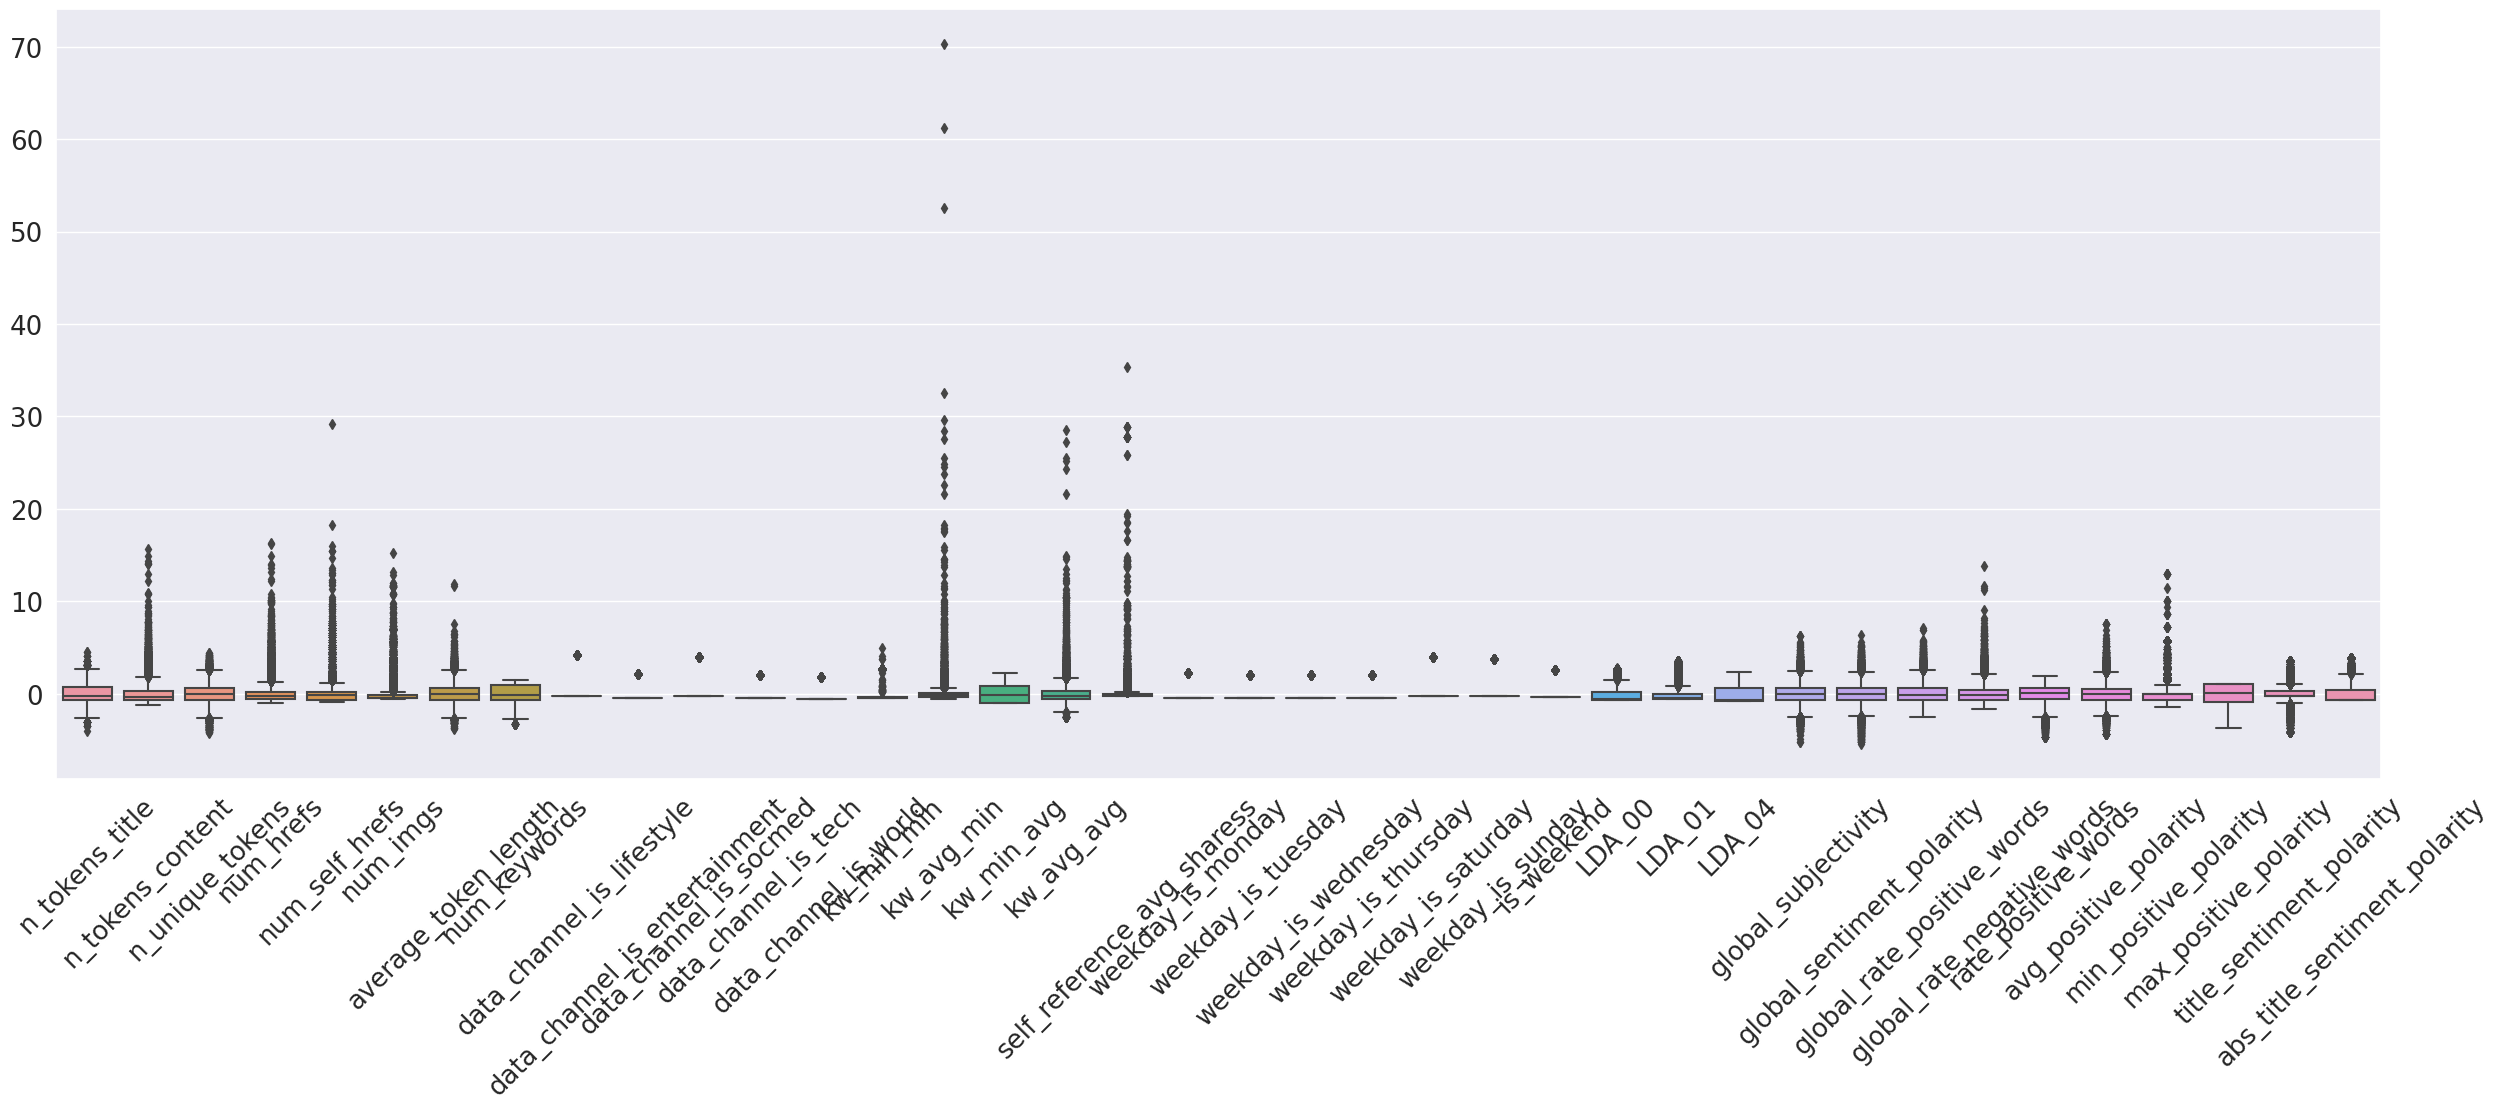

In [36]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = data_X)
plt.show()

In [37]:
X = np.array(data_X)
y = np.array(data_y.values)

In [38]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [39]:
# from sklearn.decomposition import PCA
# # instantiate PCA with n_components set to the desired number of components
# pca = PCA(n_components=10)

# # fit PCA to the feature matrix X and transform X into the new feature space
# df_X = pca.fit_transform(X)

# **Model Building: Train Test Spliting**

In [39]:
from sklearn.model_selection import train_test_split

random_state=3
# split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=random_state) 
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(23893, 38) (23893,)
(10240, 38) (10240,)


In [58]:
ytest.shape

(10240,)

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import linear_model, svm, discriminant_analysis, metrics
from scipy import optimize


In [43]:
# from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import random as rnd


In [45]:
class SVM_dual_model():

  ## constructor function that initializes the svm model with parameters
  ## max_iter = maximum number of iterations to run during training
  ## kernel_type = type of kernel functions
  ## C = tolerance of error in the svm dual optimization problem
  ## epsilon = step size
    def __init__(self, max_iter=100, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gauss
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon

    ## function to train the svm model on the input data X and labels y
    ## implements the dual optimization algorithm to solve the svm problem by finding the optimal set of alpha values.
    ## It also computes the model parameters w and b and returns the support vectors and number of iterations it took to converge.    
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
#                 if(j % 100 == 0):
#                     print(j)
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count

    ## evaluates the trained svm model on the input data X and true labels y. 
    ## it predicts the labels using the predict function.    
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred==-1,0,1)
        diff=np.abs(np.where(y==-1,0,1)-pred)
        return((len(diff)-sum(diff))/len(diff))   

    ## This function predicts the labels of input data X using the trained svm model.     
    def predict(self, X):
        return self.h(X, self.w, self.b)

    ## This function calculates the bias of the svm model using input data X, true labels y and weight w    
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)

    ## This function calculates the weights of the svm model using input data X, true labels y and alpha values    
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    ## This fuction calculates the decision function of svm model for the input data X using the weights w and bias b    
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    ## This function calculates the error between the predicted and true label for a single data point x_k    
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k

    ## This function computes the lower and upper bounds for alpha values during optimization  
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    ## This function returns a random integer between and b excluding z        
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i

    ## function for linear kernel    
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)

    ## function for quadratic kernel     
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)

    ## function for gaussian kernel     
    def kernel_gauss(self,x1, x2, sigma=1):
        return np.exp(- (np.linalg.norm(x1 - x2, 2)) ** 2 / (2 * sigma ** 2))

    ## This function predicts the probability of each data point x belonging to class 1, based on the decision function calculated during training.
    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b
    

In [48]:
C_values = [1, 0.1, 0.001, 10, 100]
step_sizes = [0.001, 0.01, 0.1, 1, 10]

for c in C_values:
    for step_size in step_sizes:
        model = SVM_dual_model(max_iter=3, kernel_type='linear', C=c, epsilon=step_size)
        model.fit(Xtrain, ytrain)
        Training_Accuracy = model.evaluate(Xtrain,ytrain)
        Test_Accuracy = model.evaluate(Xtest,ytest)
        print("C={}, Step Size={}, Training Accuracy={}, Test Accuracy={}".format(c, step_size, Training_Accuracy, Test_Accuracy))

Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.001, Training Accuracy=0.6694847863390951, Test Accuracy=0.6689453125
Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.01, Training Accuracy=0.6508182312811284, Test Accuracy=0.6548828125
Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.1, Training Accuracy=0.668856987402168, Test Accuracy=0.668359375
Iteration number exceeded the max of 3 iterations
C=1, Step Size=1, Training Accuracy=0.7237266144895995, Test Accuracy=0.71591796875
C=1, Step Size=10, Training Accuracy=0.6755116561335957, Test Accuracy=0.6759765625
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.001, Training Accuracy=0.6881094881346, Test Accuracy=0.68330078125
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.01, Training Accuracy=0.6503578453940485, Test Accuracy=0.6439453125
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.1, Training Accuracy=0.662871970

In [49]:
C_values = [1, 0.1, 0.001, 10, 100]
step_sizes = [0.001, 0.01, 0.1, 1, 10]

for c in C_values:
    for step_size in step_sizes:
        model = SVM_dual_model(max_iter=3, kernel_type='gaussian', C=c, epsilon=step_size)
        model.fit(Xtrain, ytrain)
        Training_Accuracy = model.evaluate(Xtrain,ytrain)
        Test_Accuracy = model.evaluate(Xtest,ytest)
        print("C={}, Step Size={}, Training Accuracy={}, Test Accuracy={}".format(c, step_size, Training_Accuracy, Test_Accuracy))

Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.001, Training Accuracy=0.4045954882183066, Test Accuracy=0.401953125
Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.01, Training Accuracy=0.47047252333319384, Test Accuracy=0.47001953125
Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.1, Training Accuracy=0.43389277194157283, Test Accuracy=0.4369140625
Iteration number exceeded the max of 3 iterations
C=1, Step Size=1, Training Accuracy=0.46252040346545015, Test Accuracy=0.462109375
Iteration number exceeded the max of 3 iterations
C=1, Step Size=10, Training Accuracy=0.46540827857531497, Test Accuracy=0.464453125
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.001, Training Accuracy=0.4977189971958314, Test Accuracy=0.4966796875
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.01, Training Accuracy=0.5052944377014188, Test Accuracy=0.5009765625
Iteration number exceeded the max of 3 iterati

**### IMPROVIZED SVM MODEL USING QUADRATIC KERNEL**

In [50]:
C_values = [1, 0.1, 0.001, 10, 100]
step_sizes = [0.001, 0.01, 0.1, 1, 10]

for c in C_values:
    for step_size in step_sizes:
        model = SVM_dual_model(max_iter=3, kernel_type='quadratic', C=c, epsilon=step_size)
        model.fit(Xtrain, ytrain)
        Training_Accuracy = model.evaluate(Xtrain,ytrain)
        Test_Accuracy = model.evaluate(Xtest,ytest)
        print("C={}, Step Size={}, Training Accuracy={}, Test Accuracy={}".format(c, step_size, Training_Accuracy, Test_Accuracy))

Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.001, Training Accuracy=0.8605867827397146, Test Accuracy=0.86240234375
Iteration number exceeded the max of 3 iterations
C=1, Step Size=0.01, Training Accuracy=0.8844431423429456, Test Accuracy=0.8892578125
C=1, Step Size=0.1, Training Accuracy=0.804419704515967, Test Accuracy=0.80849609375
C=1, Step Size=1, Training Accuracy=0.8356422383124764, Test Accuracy=0.840625
C=1, Step Size=10, Training Accuracy=0.800904030469175, Test Accuracy=0.7984375
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.001, Training Accuracy=0.8669903318963713, Test Accuracy=0.871875
Iteration number exceeded the max of 3 iterations
C=0.1, Step Size=0.01, Training Accuracy=0.877788473611518, Test Accuracy=0.8837890625
C=0.1, Step Size=0.1, Training Accuracy=0.8219143682250032, Test Accuracy=0.8287109375
C=0.1, Step Size=1, Training Accuracy=0.8301594609299795, Test Accuracy=0.83447265625
C=0.1, Step Size=10, Training Accurac

### **Precision, Recall and F1 scores**

In [51]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_fscore_support

model = SVM_dual_model(max_iter=3, kernel_type='linear', C=1, epsilon=0.01)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest) 
y_pred_binary = (y_pred + 1) / 2
print(y_pred_binary)

precision, recall, f1_score, _ = precision_recall_fscore_support(ytest, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)



Iteration number exceeded the max of 3 iterations
[1. 1. 1. ... 0. 0. 1.]
Precision: 0.366796875
Recall: 0.366796875
F1-score: 0.366796875


In [52]:
model = SVM_dual_model(max_iter=3, kernel_type='gaussian', C=1, epsilon=0.01)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest) 
y_pred_binary = (y_pred + 1) / 2
print(y_pred_binary)

precision, recall, f1_score, _ = precision_recall_fscore_support(ytest, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Iteration number exceeded the max of 3 iterations
[1. 1. 1. ... 0. 0. 1.]
Precision: 0.26640625
Recall: 0.26640625
F1-score: 0.26640625


In [53]:
model = SVM_dual_model(max_iter=3, kernel_type='quadratic', C=1, epsilon=0.01)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest) 
y_pred_binary = (y_pred + 1) / 2
print(y_pred_binary)

precision, recall, f1_score, _ = precision_recall_fscore_support(ytest, y_pred, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)

Iteration number exceeded the max of 3 iterations
[0. 1. 1. ... 1. 1. 1.]
Precision: 0.4125
Recall: 0.4125
F1-score: 0.4125


### **LINEAR SVM WITHOUT LAGRANGE MULTIPLIERS**

In [56]:
class support_vector_machine:
    def __init__(self,C=10,features=38,sigma_sq=0.1,kernel="None"):
        self.C=C
        self.features=features
        self.sigma_sq=sigma_sq
        self.kernel=kernel
        self.weights=np.zeros(features)
        self.bias=0.
        
    def __similarity(self,x,l):
        return np.exp(-sum((x-l)**2)/(2*self.sigma_sq))

    def gaussian_kernel(self,x1,x):
        m=x.shape[0]
        n=x1.shape[0]
        op=[[self.__similarity(x1[x_index],x[l_index]) for l_index in range(m)] for x_index in range(n)]
        return np.array(op)

    def loss_function(self,y,y_hat):
        sum_terms=1-y*y_hat
        sum_terms=np.where(sum_terms<0,0,sum_terms)
        return (self.C*np.sum(sum_terms)/len(y)+sum(self.weights**2)/2)

    def fit(self,x_train,y_train,epochs=1000,print_every_nth_epoch=100,learning_rate=0.01):
        y=y_train.copy()
        x=x_train.copy()
        self.initial=x.copy()
        
        assert x.shape[0]==y.shape[0] , "Samples of x and y don't match."
        assert x.shape[1]==self.features , "Number of Features don't match"
        
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,x)
            m=x.shape[0]
            self.weights=np.zeros(m)

        n=x.shape[0]
        
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            grad_weights=(-self.C*np.multiply(y,x.T).T+self.weights).T
            
            for weight in range(self.weights.shape[0]):
                grad_weights[weight]=np.where(1-y_hat<=0,self.weights[weight],grad_weights[weight])
            
            grad_weights=np.sum(grad_weights,axis=1)
            self.weights-=learning_rate*grad_weights/n
            grad_bias=-y*self.bias
            grad_bias=np.where(1-y_hat<=0,0,grad_bias)
            grad_bias=sum(grad_bias)
            self.bias-=grad_bias*learning_rate/n
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------------- Epoch {} --> Loss = {} ---------------".format(epoch+1, self.loss_function(y,y_hat)))

    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred==-1,0,1)
        diff=np.abs(np.where(y==-1,0,1)-pred)
        return((len(diff)-sum(diff))/len(diff))

    def predict(self,x):
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,self.initial)
        return np.where(np.dot(x,self.weights)+self.bias>0,1,-1)                   

In [57]:
model2=support_vector_machine(C=1, sigma_sq=0.01)
model2.fit(Xtrain,ytrain,epochs=20,print_every_nth_epoch=2,learning_rate=0.01)
print("Training Accuracy = {}".format(model2.evaluate(Xtrain,ytrain)))
print("Test Accuracy = {}".format(model2.evaluate(Xtest,ytest)))
y_pred = model2.predict(Xtest) 
y_pred_binary = (y_pred + 1) / 2
print(y_pred_binary)

--------------- Epoch 2 --> Loss = 0.9994545004509803 ---------------
--------------- Epoch 4 --> Loss = 0.9983902878439205 ---------------
--------------- Epoch 6 --> Loss = 0.9973677956184525 ---------------
--------------- Epoch 8 --> Loss = 0.9963853840805202 ---------------
--------------- Epoch 10 --> Loss = 0.995441478061872 ---------------
--------------- Epoch 12 --> Loss = 0.9945345643791721 ---------------
--------------- Epoch 14 --> Loss = 0.9936631893931991 ---------------
--------------- Epoch 16 --> Loss = 0.9928259566641898 ---------------
--------------- Epoch 18 --> Loss = 0.9920215246995387 ---------------
--------------- Epoch 20 --> Loss = 0.9912486047902145 ---------------
Training Accuracy = 0.48855313271669526
Test Accuracy = 0.4892578125
[1. 1. 1. ... 0. 0. 1.]


### **Testing the dataset using another classifier Logistics Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
 
# train a logistic regression model
# model = LogisticRegression(max_iter=1000)
model = LogisticRegression(max_iter=1000, C=0.1)
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print(classification_report(ytest, y_pred, zero_division=1))
accuracy_score(ytest, y_pred)

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      5495
           1       0.62      0.59      0.61      4745

    accuracy                           0.64     10240
   macro avg       0.64      0.64      0.64     10240
weighted avg       0.64      0.64      0.64     10240



0.6447265625

Logistic classifier also has less accuracy rate compared to quadratic SVM classifer.